[Accueil](../../../index.ipynb) > [Sommaire de Terminale](../../index.ipynb)

# 6.3 Diviser pour régner

Le “diviser pour régner” (divide and conquer) est une méthode algorithmique basée sur le principe suivant:

On prend un problème (généralement complexe à résoudre), on divise ce problème en une multitude de petits problèmes, l'idée étant que les "petits problèmes" seront plus simples à résoudre que le problème original. Une fois les petits problèmes résolus, on recombine les "petits problèmes résolus" afin d'obtenir la solution du problème de départ.

La méthode se décompose en trois étapes :

1. Diviser : on divise l'instance de départ en de plus petites.
2. Régner : on résout l'algorithme sur les "petites" instances précédentes.
3. On fusionne les résultats précédents pour obtenir le résultat final.

Les algorithmes basés sur le paradigme "diviser pour régner" sont très souvent des algorithmes **récursifs**.

- [Comparaison de complexité sur la fonction puissance](exp_time_comparaison.ipynb)
- [Le tri fusion](tri_fusion.ipynb)
- la recherche dichotomique, vue dans le [programme de première NSI](../../../Premiere/8_Algorithmique/4_recherche_dichotomique.ipynb)


## Exemple sur la puissance d'un nombre



### Approche récursive

Lors de l’utilisation de la récursivité, nous avions vu l’exemple du calcul de la puissance d’un nombre qui 
utilisait cette définition récursive:

$$
\left\{
    \begin{array}{ll}
        x^0 = 1\\
        x^{n+1} = x \times x^n
    \end{array}
\right.
$$

Ce qui s'implémente en Python de la façon suivante:

In [1]:
def puissance(x, n):
    """
    Retourne x à la puissance n
    """
    if n==0:
        return 1
    else:
        return x*puissance(x, n-1)

Calculons la complexité temporelle T(n) de cet algorithme.
La complexité se détermine par le **nombre de multiplications nécessaires**.

$T(x^0) = 0$ et $T(x^n) = 1+T(x^{n-1})$ soit ${T(x^0) = 0}$ et ${T(x^n) -  T(x^{n-1}) = 1}$

On a donc: 

- $T(x^0) = 0$
- ${T(x^1) -  T(x^{0}) = 1}$
- ${T(x^2) -  T(x^{1}) = 1}$
- ${T(x^3) -  T(x^{2}) = 1}$
- ...

- ${T(x^n) -  T(x^{n-1}) = 1}$

En sommant toutes ces équations on obtient $T(x^0) + T(x^n) = n$ soit ${T(x^n) = n}$

<div class="alert alert-info">

**La complexité de algorithme est donc linéaire.**

=> Pour calculer 2^100 il faut effectuer 100 multiplications.

</div>


### Approche diviser pour régner

Voici une nouvelle approche : calculons $x^n$.

$$
\left\{
    \begin{array}{ll}
        x^0 = 1\\
        x^1 = x~evite~un~calcul\\
        si~n~est~pair~(n=2k)~alors~x^{2k} = x^{k} \times x^{k}\\
        si~n~est~impair~(n=2k+1)~alors~x^{2k+1} = x \times x^{2k}
    \end{array}
\right.
$$

Calculons la complexité temporelle de la méthode diviser pour régner.

$$
\left\{
    \begin{array}{ll}
        T(x^0) = 0\\
        T(x^1) = 0\\
        si~n~est~pair~(n=2k)~alors~T(x^{2k}) = 1 + T(x^{k})\\
        si~n~est~impair~(n=2k+1)~alors~T(x^{2k+1}) = 1 + T(x^{2k})
    \end{array}
\right.
$$

Ici la complexité est plus dure à calculer car elle dépend de la parité des puissances, par exemple:
- 15	=>14	=>7	=>6	=>3	=>2	=>1	=>0	(7 transitions)
- 16	=>8	=>4	=>2	=>1	=>0			(5 transitions)

Simplifions le problème en supposant que l’exposant est une puissance de 2 (4, 8, 16….).

Prenons l’exemple de $x^{64}$
$$ T(x^{64})=1+T(x^{32})=2+T(x^{16}=3+T(x^8)=4+CT(x^4)=5+T(x^2)=6+T(x^1)=6 $$

On remarque que $2^6=64$.

Pour une puissance de n, on peut approximer que la complexité est k avec ${2^k = n}$.

Comment extraire k de cette équation ? En utilisant le logarithme de base 2.

Ainsi ${T(n)=log_2(n)}$

<div class="alert alert-info">

La complexité temporelle en utilisant le type d'algorithme diviser pour régner est ici **logarithmique**.
    
Ainsi pour caculer une puissance de 1 million , il faudra uniquement 20 itérations car $1 million \approx 2^{20}$

</div>

### Comparaison des deux approches

<table>
    <thead><td>puissance du nombre</td><td>complexité récursive</td><td>complexité diviser pour régner</td></thead>
    <tbody>
        <tr><td>16</td><td>16</td><td>4</td></tr>
        <tr><td>128</td><td>128</td><td>7</td></tr>
        <tr><td>1024</td><td>1024</td><td>10</td></tr>
        <tr><td>$2^{20}=1048576$</td><td>$1048576$</td><td>20</td></tr>
    </tbody>
</table>

<div class="alert alert-danger">Implémenter la fonction puissance selon plusieurs manières et comparer les temps d'exécution.</div>

Se rendre sur la [comparaison de complexité sur la fonction puissance](exp_time_comparaison.ipynb)


## Le tri fusion

[voir la chorégraphie en musique](https://www.youtube.com/watch?v=dENca26N6V4)

 [une vidéo explicative (12 min) ](https://www.youtube.com/watch?v=OEmlVnH3aUg)

La recherche dichotomique d’un élément dans une liste triée, [vue en première](../../../Premiere/8_Algorithmique/4_recherche_dichotomique.ipynb) , consiste à séparer la liste triée en 2 sous listes, puis à réitérer l’opération en se ramenant à un seul élément. La recherche dichotomique utilise donc le type d'algorithme 'Diviser pour régner'.

Le tri fusion s’appuie sur ce mécanisme de **dichotomie** et s’implémente souvent de façon **récursive**.

### Histoire

Le tri fusion a été inventé en 1945 par un des pères de l'informatique, [John von Neumann](../../../Premiere/6_Architecture/1_modele_architecture.ipynb#von_neumann).

### Principe
Comme tout algorithme de tri, le principe consiste à partir d’une liste désordonnée et à obtenir une liste triée dans l’ordre croissant.
Voici la décomposition du principe:
- On partitionne la liste en deux parts;
- On fusionne l’ensemble des parties.

La principale difficulté provient de l’aspect **récursif** de l’implémentation.

**Exemples**

Voici la représentation du résultat pour la liste \[4, 3, 2, 1\]
Dans le cas d’une longueur de liste qui est une puissance de 2, le graphe est symétrique.

![](graphe1.png)

Et le voici pour la liste \[5, 4, 3, 2, 1\]
![](graphe2.png)

Exemple de la [vidéo de la chorégraphie du tri fusion](https://www.youtube.com/watch?v=dENca26N6V4) \[4, 2, 8, 6, 0, 5, 1, 7, 3, 9\].
![](graphe3.png)

### Implémentation en Python

#### La fusion

Nous allons commencer par implémenter la **fusion** de 2 listes triées.

Voici la signature de la fonction:

In [1]:
def fusion(T1, T2):
    """
    T1 : une liste triée
    T2 : une liste triée
    Retourne la fusion des 2 listes triée
    """
    result=[]
    #TODO
    return result


print(fusion([1,3,4,7], [2,5,6,9,10,11,12]))
print(fusion([2], [1]))

[]
[]


#### Le tri fusion

L'algorithme est naturellement décrit de façon récursive.

- Si le tableau n'a qu'un élément, il est déjà trié.
- Sinon, séparer le tableau en deux parties à peu près égales.
- Trier récursivement les deux parties avec l'algorithme du tri fusion.
- Fusionner les deux tableaux triés en un seul tableau trié.

En pseudo-code :

```
entrée : un tableau T
sortie : une permutation triée de T
fonction triFusion(T[1, …, n])
      si n ≤ 1
              renvoyer T
      sinon
              tg = triFusion(T[1, …, n/2])
              td = triFusion(T[n/2 + 1, …, n])
              renvoyer fusion(td, tg)


In [3]:
def tri_fusion(table):
    """
    table : a list of elements
    return the sorted table
    """
    # cas d'arret, le tableau n'a plus qu'un élément, il est donc trié
    pass
    # cas général : on peut découper
    pass
tri = tri_fusion([9,8,7,6,5,4,3,2,1,0])
print(tri)

None


La complexité [du tri par insertion ou du tri par selection](../../../Premiere/8_Algorithmique/2_tri_insertion_selection.ipynb) est quadratique : $\boxed{T_{insertion}(n)=\Theta(n^2)}$ et $\boxed{T_{selection}(n)=\Theta(n^2)}$


Le calcul de la complexité temporelle de l’algorithme du tri fusion n’est pas au programme mais on peut “sentir” que pour une liste qui contient $2^k$ éléments, il faudra k étapes diviser ces $2^k$ éléments pour se ramener à des listes uniques. La complexité pour la **division** est donc **logarithmique**.

Ensuite la **fusion** prend également k étapes, mais la complexité dépend de la longueur des listes à fusionner qui double à chaque étape, on se ramène donc à du **linéaire**.

<div class="alert alert-info">

On admettra que la complexité pour trier une liste de n éléments est :

$\boxed{T_{fusion}(n)=\Theta(n\times log_2(n))}$ on di que la complexité du tri fusion est **linearithmique** (ou quasi- linéaire).
    
</div>

## Mesures

Mesurons le temps nécessaire pour trier des listes de différentes longueurs et comparons cela avec la courbe théorique.

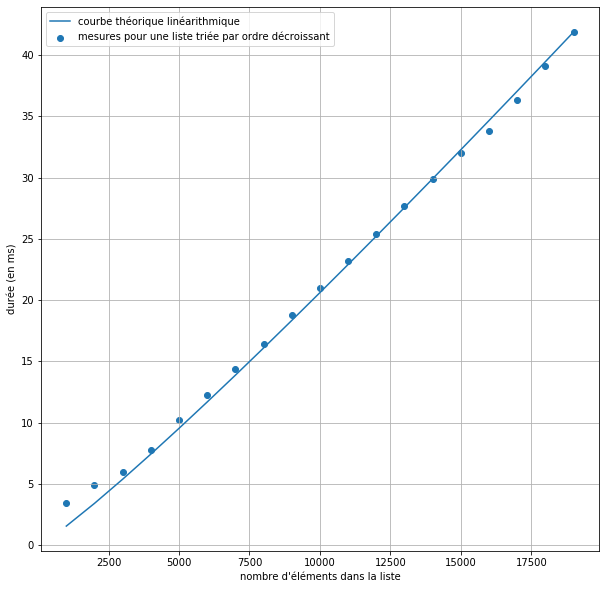

In [51]:
import matplotlib.pyplot as plt
from math import log2, factorial
from time import process_time

results = []
for i in range(1000,21000, 1000):
    l = [v for v in range(i)]
    l.reverse()
    time1 = process_time()
    l = tri_fusion(l)
    time2 = process_time()
    results.append((len(l), (time2-time1)*1000))

# prenons la dernière mesure
n, t = results[-1]
# on calcule la valeur du n log(n)
value = n*log2(n)
# or on mesure t, le coef à apporter est donc c= t/value
coef = t/value

plt.figure(figsize=(10, 10))
x=[r[0] for r in results]
y1=[r[1] for r in results]
plt.scatter(x, y1, label='mesures pour une liste triée par ordre décroissant')
y2 = [coef*i*log2(i) for i in x]
plt.plot(x, y2, label='courbe théorique linéarithmique')
plt.xlabel("nombre d'éléments dans la liste")
plt.ylabel("durée (en ms)")
plt.legend()
plt.grid(True)
plt.show()

### Comparaison avec le tri par insertion

Le tri par insertion est de complexité temporelle quadratique. On note $\boxed{T_{insertion}(n)=\Theta(n^2)}$

Le tri fusion est de complexité temporelle quasi-linéaire (linéarithmique). On note $\boxed{T_{fusion}(n)=\Theta(n \times log_2(n))}$

Voici concrètement ce que cela implique sur les durées de tri

![](graphe4.png)

## Conclusion

Le principe de la méthode diviser pour régner est:
- découper le problème en sous-problèmes qui s’énoncent de la même manière;
- résoudre les cas limites;
- combiner les solutions.

Nous avons observé que dans certains cas (calcul de puissance et tri fusion), le gain de temps est considérable par rapport à une approche plus “naïve”.

Cette méthode peut se révéler parfois efficace parfois non, tout dépend du type de problème à résoudre.

Le calcul de la complexité peut donner un ordre d’idée du comportement mais il est souvent difficile à solutionner car il faut expliciter une suite mathématique.

[Accueil](../../../index.ipynb) > [Sommaire de Terminale](../../index.ipynb)